# Assignment 1

First we need to read data. In this assignment I am using Tom Swayer's data.

In [137]:
l = open('/home/mridul/Desktop/NLP/74-0.txt', 'r')
# tokens is a list containing all the tokens
tokens = l.read().split()
print 'Number of tokens = ',len(tokens)

Number of tokens =  73841


After finding number of tokens, we need to find number of distint words in the corpus. After finding types we will find TTR

In [139]:
types = set(tokens)
print 'Number of types = ',len(types)
ttr = len(types)/float(len(tokens))
print 'TTR = ',ttr

Number of types =  14182
TTR =  0.192061320946


After finding TTR ratio we need to check different Zipf's law.
We will first see the relation of frequency of a word and length of the words

<IPython.core.display.Javascript object>


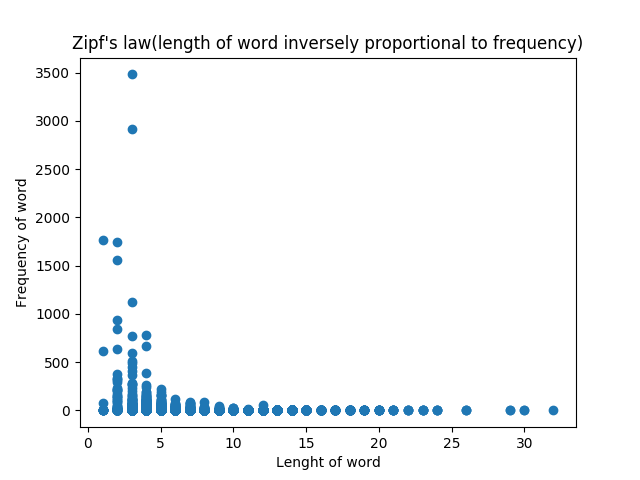

Text(0,0.5,'Frequency of word')

In [156]:
from collections import Counter
# freq contains frequency of each word
freq = Counter(tokens)
# words is a list of all the different words of the corpus
words = Counter(tokens).keys()
# now words will contain length of all words
words = [len(i) for i in words]
# r is the frequency of all the words of the corpus
r = Counter(tokens).values()

plt.figure(1)
plt.title('Zipf\'s law(length of word inversely proportional to frequency)')
plt.plot(words,r,'o')
plt.xlabel('Lenght of word')
plt.ylabel('Frequency of word')

Thus we can see that this empirical law holds true.
Now we will see the relation between number of meanings attached to a word and frequency of that word. For that I have chosen some random set of words.

<IPython.core.display.Javascript object>


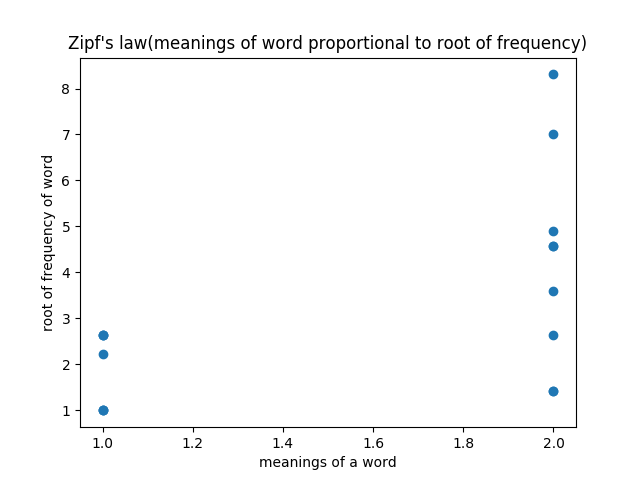

Text(0,0.5,'root of frequency of word')

In [157]:
# In this part we will check the relation between frequency of words and number of meaning associated to them
random_words = ['date','leaves','rose','right','left','bear','bark','can','kind','blind','shelf','divine','wall','quite','week','friends']
meanings = [2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1]
root_freq_random_words = [freq[i]**0.5 for i in random_words]

plt.figure(2)
plt.title('Zipf\'s law(meanings of word proportional to root of frequency)')
plt.plot(meanings,root_freq_random_words,'o')
plt.xlabel('meanings of a word')
plt.ylabel('root of frequency of word')

Thus we can see that for these set of words meanings is not always proportional to root of frequency of the word. Next we need to see the relation between frequency of a word and rank of that word. 

<IPython.core.display.Javascript object>


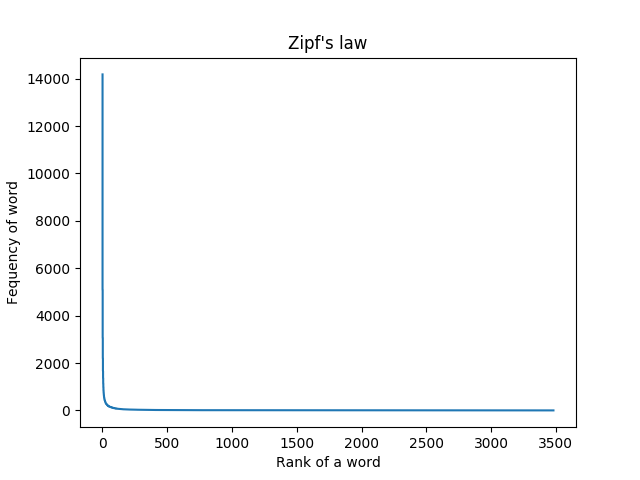

Text(0,0.5,'Fequency of word')

In [158]:
r.sort(reverse = True)
ranks = range(1,len(r)+1)
plt.figure(3)
plt.title('Zipf\'s law')
plt.plot(r,ranks)
plt.xlabel('Rank of a word')
plt.ylabel('Fequency of word')

On logarithmic scale

<IPython.core.display.Javascript object>


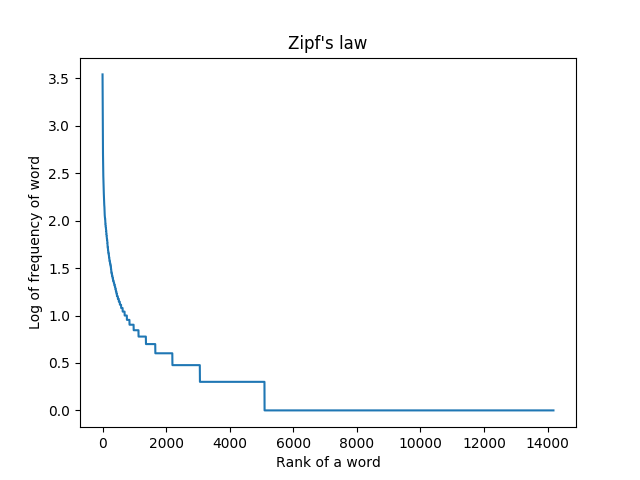

Text(0,0.5,'Log of frequency of word')

In [147]:
# As we increase size of corpus we need to see how does the vocablary size changes
# importing the required module
#import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import math
plt.figure(4)
plt.title('Zipf\'s law')
plt.plot(ranks,[math.log(y,10)for y in r])
plt.xlabel('Rank of a word')
plt.ylabel('Log of frequency of word')


Now we need to check the relation between vocablary and number of tokens in a corpus.(Heap's law)

<IPython.core.display.Javascript object>


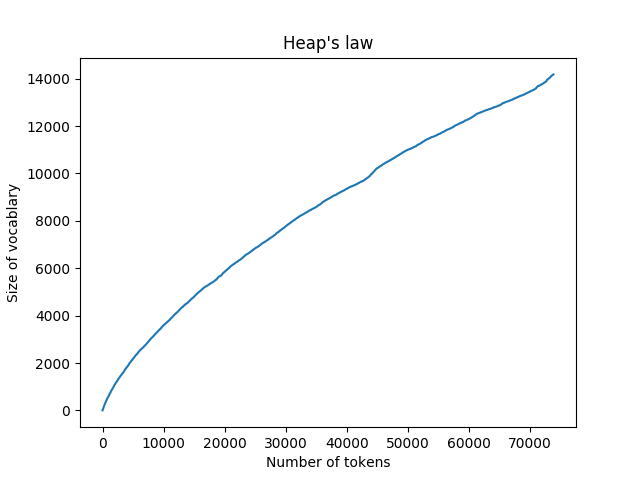

Text(0,0.5,'Size of vocablary')

In [155]:
curr_vocab = set()
counter = 0
vocab_size = []

x = []
for i in tokens:
    if(i not in curr_vocab):
        curr_vocab.add(i)
    counter = counter + 1
    x.append(counter)
    vocab_size.append(len(curr_vocab))

plt.figure(5)
plt.title('Heap\'s law')
plt.plot(x, vocab_size)
plt.xlabel('Number of tokens')
plt.ylabel('Size of vocablary')

Next we will check the similarity between experimental results and heaps law. 

In [151]:
# Function in ideal case
def func(x, k, beta):
    return k*(x**beta)

<IPython.core.display.Javascript object>


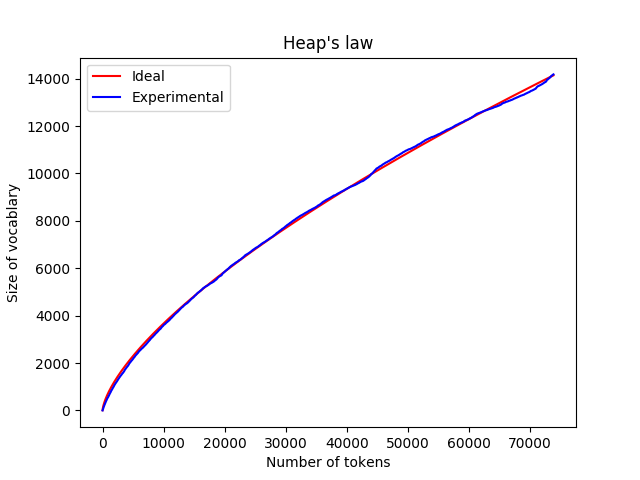

In [152]:
from scipy.optimize import curve_fit
popt,pcov= curve_fit(func, x, vocab_size)
ideal = [func(i,popt[0],popt[1]) for i in x]
plt.figure(6)
plt.plot(x, ideal,'r')
plt.plot(x,vocab_size,'b')
plt.show()
plt.title('Heap\'s law')
plt.xlabel('Number of tokens')
plt.ylabel('Size of vocablary')
plt.legend(['Ideal', 'Experimental'], loc='upper left')

Thus heap's law holds true.

In [153]:
plt.show()